In [3]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec
from tqdm import tqdm
import ROOT
import math
import pickle
'''
from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *
from isolation import *
'''
import matplotlib as mpl

#mpl.rc('xtick', labelsize=16) 
#mpl.rc('ytick', labelsize=16) 
#mpl.rc('axes', labelsize=16, titlesize=20)
#mpl.rcParams["legend.title_fontsize"]=18

#plt.style.use(hep.style.CMS)
%matplotlib inline
lw=1.2

Welcome to JupyROOT 6.30/04


In [2]:
from ROOT import TStyle, TPad, TLatex, TASImage, kBlack, kWhite, TGaxis
 
def setTDRStyle():
 
  tdrStyle = TStyle("tdrStyle","Style for P-TDR")
 
  # For the canvas:
  tdrStyle.SetCanvasBorderMode(0)
  tdrStyle.SetCanvasColor(kWhite)
  tdrStyle.SetCanvasDefH(600) # height of canvas
  tdrStyle.SetCanvasDefW(600) # width of canvas
  tdrStyle.SetCanvasDefX(0)   # position on screen
  tdrStyle.SetCanvasDefY(0)
 
  tdrStyle.SetPadBorderMode(0)
  #tdrStyle.SetPadBorderSize(Width_t size = 1)
  tdrStyle.SetPadColor(kWhite)
  tdrStyle.SetPadGridX(False)
  tdrStyle.SetPadGridY(False)
  tdrStyle.SetGridColor(0)
  tdrStyle.SetGridStyle(3)
  tdrStyle.SetGridWidth(1)
 
  # For the frame:
  tdrStyle.SetFrameBorderMode(0)
  tdrStyle.SetFrameBorderSize(1)
  tdrStyle.SetFrameFillColor(0)
  tdrStyle.SetFrameFillStyle(0)
  tdrStyle.SetFrameLineColor(1)
  tdrStyle.SetFrameLineStyle(1)
  tdrStyle.SetFrameLineWidth(1)
 
  # For the histo:
  #tdrStyle.SetHistFillColor(1)
  #tdrStyle.SetHistFillStyle(0)
  tdrStyle.SetHistLineColor(1)
  tdrStyle.SetHistLineStyle(1)
  tdrStyle.SetHistLineWidth(1)
  #tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
  #tdrStyle.SetNumberContours(Int_t number = 20)
 
  tdrStyle.SetEndErrorSize(2)
  #tdrStyle.SetErrorMarker(20)
  tdrStyle.SetErrorX(0)
  tdrStyle.SetMarkerStyle(20)
 
  # For the fit/function:
  tdrStyle.SetOptFit(1)
  tdrStyle.SetFitFormat("5.4g")
  tdrStyle.SetFuncColor(2)
  tdrStyle.SetFuncStyle(1)
  tdrStyle.SetFuncWidth(1)
 
  # For the date:
  tdrStyle.SetOptDate(0)
  #tdrStyle.SetDateX(Float_t x = 0.01)
  #tdrStyle.SetDateY(Float_t y = 0.01)
 
  # For the statistics box:
  tdrStyle.SetOptFile(0)
  tdrStyle.SetOptStat(0) # to display the mean and RMS:   SetOptStat("mr")
  tdrStyle.SetStatColor(kWhite)
  tdrStyle.SetStatFont(42)
  tdrStyle.SetStatFontSize(0.025)
  tdrStyle.SetStatTextColor(1)
  tdrStyle.SetStatFormat("6.4g")
  tdrStyle.SetStatBorderSize(1)
  tdrStyle.SetStatH(0.1)
  tdrStyle.SetStatW(0.15)
  #tdrStyle.SetStatStyle(Style_t style = 1001)
  #tdrStyle.SetStatX(Float_t x = 0)
  #tdrStyle.SetStatY(Float_t y = 0)
 
  # For pad margins:
  tdrStyle.SetPadTopMargin(0.05)
  tdrStyle.SetPadBottomMargin(0.13)
  tdrStyle.SetPadLeftMargin(0.16)
  tdrStyle.SetPadRightMargin(0.02)
 
  # For the Global title:
  tdrStyle.SetOptTitle(0)
  tdrStyle.SetTitleFont(42)
  tdrStyle.SetTitleColor(1)
  tdrStyle.SetTitleTextColor(1)
  tdrStyle.SetTitleFillColor(10)
  tdrStyle.SetTitleFontSize(0.05)
  #tdrStyle.SetTitleH(0) # set the height of the title box
  #tdrStyle.SetTitleW(0) # set the width of the title box
  #tdrStyle.SetTitleX(0) # set the position of the title box
  #tdrStyle.SetTitleY(0.985) # set the position of the title box
  #tdrStyle.SetTitleStyle(Style_t style = 1001)
  #tdrStyle.SetTitleBorderSize(2)
 
  # For the axis titles:
  tdrStyle.SetTitleColor(1, 'XYZ')
  tdrStyle.SetTitleFont(42, 'XYZ')
  tdrStyle.SetTitleSize(0.06, 'XYZ')
  # tdrStyle.SetTitleXSize(Float_t size = 0.02) # another way to set the size?
  # tdrStyle.SetTitleYSize(Float_t size = 0.02)
  tdrStyle.SetTitleXOffset(0.9)
  tdrStyle.SetTitleYOffset(1.25)
  # tdrStyle.SetTitleOffset(1.1, 'Y') # another way to set the Offset
 
  # For the axis labels:
  tdrStyle.SetLabelColor(1, 'XYZ')
  tdrStyle.SetLabelFont(42, 'XYZ')
  tdrStyle.SetLabelOffset(0.007, 'XYZ')
  tdrStyle.SetLabelSize(0.05, 'XYZ')
 
  # For the axis:
  tdrStyle.SetAxisColor(1, 'XYZ')
  tdrStyle.SetStripDecimals(True)
  tdrStyle.SetTickLength(0.03, 'XYZ')
  tdrStyle.SetNdivisions(510, 'XYZ')
  tdrStyle.SetPadTickX(1) # to get tick marks on the opposite side of the frame
  tdrStyle.SetPadTickY(1)
 
  # Change for log plots:
  tdrStyle.SetOptLogx(0)
  tdrStyle.SetOptLogy(0)
  tdrStyle.SetOptLogz(0)
 
  # Postscript options:
  tdrStyle.SetPaperSize(20.,20.)
  #tdrStyle.SetLineScalePS(Float_t scale = 3)
  #tdrStyle.SetLineStyleString(Int_t i, const char* text)
  #tdrStyle.SetHeaderPS(const char* header)
  #tdrStyle.SetTitlePS(const char* pstitle)
 
  #tdrStyle.SetBarOffset(Float_t baroff = 0.5)
  #tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
  #tdrStyle.SetPaintTextFormat(const char* format = "g")
  #tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
  #tdrStyle.SetTimeOffset(Double_t toffset)
  #tdrStyle.SetHistMinimumZero(True)
 
  tdrStyle.SetHatchesLineWidth(5)
  tdrStyle.SetHatchesSpacing(0.05)
 
  tdrStyle.cd()
#setTDRStyle()

In [3]:


filename = "./Energy_Bins/SinglePionTiming_2p2_100GeV/output.root"
file = uproot.open(filename)


In [4]:
file.keys()

['ticlDumper;1',
 'ticlDumper/trackstersCLUE3DHigh;1',
 'ticlDumper/trackstersTiclCandidate;1',
 'ticlDumper/simtrackstersSC;1',
 'ticlDumper/simtrackstersCP;1',
 'ticlDumper/simtracksters2HitsSC;1',
 'ticlDumper/simtracksters2HitsCP;1',
 'ticlDumper/trackstersSuperclusteringDNN;1',
 'ticlDumper/candidates;1',
 'ticlDumper/associations;1',
 'ticlDumper/tracks;1',
 'ticlDumper/simTICLCandidate;1']

In [5]:
def compute_residuals_energies(file_name):
    open_file = uproot.open(file_name)
    f_simTICLCandidate = open_file ["ticlDumper/simTICLCandidate;1"]
    f_candidates = open_file["ticlDumper/candidates;1"]
    candidate_time = f_candidates["candidate_time"].array()
    candidate_timeErr= f_candidates["candidate_timeErr"].array()
    candidate_energy= f_candidates["candidate_energy"].array()
    candidate_px= f_candidates["candidate_px"].array()
    candidate_py= f_candidates["candidate_py"].array()
    
    mask_candidate_timeErr=(candidate_timeErr>0)
    candidate_time_clean=candidate_time[mask_candidate_timeErr]
    candidate_energy_clean=candidate_energy[mask_candidate_timeErr]
    candidate_px_clean=candidate_px[mask_candidate_timeErr]
    candidate_py_clean=candidate_py[mask_candidate_timeErr]
    
    
    simcandidate_time = f_simTICLCandidate["simTICLCandidate_time"].array()
    simcandidate_charge=f_simTICLCandidate["simTICLCandidate_charge"].array()
    
    candidate_charge=f_candidates["candidate_charge"].array()
    candidate_charge_clean=candidate_charge[mask_candidate_timeErr]
    mask_neutral=(candidate_charge_clean==0)
    
    ticl_residuals=[]
    ticl_energies=[]
    ticl_pt=[]
    ticl_isCharged=[]
    
    for i in tqdm(range(len(simcandidate_time))):
        for j in range(len(candidate_time_clean[i])):
            ticl_residuals.append(simcandidate_time[i][0]-candidate_time_clean[i][j])
            ticl_energies.append(candidate_energy_clean[i][j])
            ticl_pt.append(math.sqrt(candidate_px_clean[i][j]**2+candidate_py_clean[i][j]**2))
            ticl_isCharged.append(not candidate_charge_clean[i][j]==0)
    return ticl_residuals, ticl_energies, ticl_pt, ticl_isCharged

def compute_residuals_energiesMTD(file_name):
    open_file = uproot.open(file_name)
    f_simTICLCandidate = open_file ["ticlDumper/simTICLCandidate;1"]
    f_candidates = open_file["ticlDumper/candidates;1"]
    candidate_time = f_candidates["candidate_time_MTD"].array()
    candidate_timeErr= f_candidates["candidate_time_MTD_err"].array()
    candidate_energy= f_candidates["candidate_energy"].array()
    candidate_px= f_candidates["candidate_px"].array()
    candidate_py= f_candidates["candidate_py"].array()
    
    mask_candidate_timeErr=(candidate_timeErr>0)
    candidate_time_clean=candidate_time[mask_candidate_timeErr]
    candidate_energy_clean=candidate_energy[mask_candidate_timeErr]
    candidate_px_clean=candidate_px[mask_candidate_timeErr]
    candidate_py_clean=candidate_py[mask_candidate_timeErr]
    
    
    simcandidate_time = f_simTICLCandidate["simTICLCandidate_time"].array()
    simcandidate_charge=f_simTICLCandidate["simTICLCandidate_charge"].array()
    
    candidate_charge=f_candidates["candidate_charge"].array()
    candidate_charge_clean=candidate_charge[mask_candidate_timeErr]
    mask_neutral=(candidate_charge_clean==0)
    
    ticl_residuals=[]
    ticl_energies=[]
    ticl_pt=[]
    ticl_isCharged=[]
    
    for i in tqdm(range(len(simcandidate_time))):
        for j in range(len(candidate_time_clean[i])):
            ticl_residuals.append(simcandidate_time[i][0]-candidate_time_clean[i][j])
            ticl_energies.append(candidate_energy_clean[i][j])
            ticl_pt.append(math.sqrt(candidate_px_clean[i][j]**2+candidate_py_clean[i][j]**2))
            ticl_isCharged.append(not candidate_charge_clean[i][j]==0)
    return ticl_residuals, ticl_energies, ticl_pt, ticl_isCharged


'''
def compute_residuals_energiesAVG(file_name):
    open_file = uproot.open(file_name)
    f_simTICLCandidate = open_file ["ticlDumper/simTICLCandidate;1"]
    f_candidates = open_file["ticlDumper/candidates;1"]
    candidate_time = f_candidates["candidate_time"].array()
    candidate_timeErr= f_candidates["candidate_timeErr"].array()
    
    candidate_time_MTD = f_candidates["candidate_time_MTD"].array()
    candidate_time_MTDErr= f_candidates["candidate_time_MTD_err"].array()
    
    candidate_energy= f_candidates["candidate_energy"].array()
    candidate_px= f_candidates["candidate_px"].array()
    candidate_py= f_candidates["candidate_py"].array()
    
    mask_candidate_timeErr=(candidate_timeErr>0)
    candidate_time_clean=candidate_time[mask_candidate_timeErr]
    candidate_energy_clean=candidate_energy[mask_candidate_timeErr]
    candidate_px_clean=candidate_px[mask_candidate_timeErr]
    candidate_py_clean=candidate_py[mask_candidate_timeErr]
    
    
    simcandidate_time = f_simTICLCandidate["simTICLCandidate_time"].array()
    simcandidate_charge=f_simTICLCandidate["simTICLCandidate_charge"].array()
    
    candidate_charge=f_candidates["candidate_charge"].array()
    candidate_charge_clean=candidate_charge[mask_candidate_timeErr]
    mask_neutral=(candidate_charge_clean==0)
    
    ticl_residuals=[]
    ticl_energies=[]
    ticl_pt=[]
    ticl_isCharged=[]
    
    for i in tqdm(range(len(simcandidate_time))):
        for j in range(len(candidate_time)):
            if(candidate_time)
            ticl_residuals.append(simcandidate_time[i][0]-candidate_time_clean[i][j])
            ticl_energies.append(candidate_energy_clean[i][j])
            ticl_pt.append(math.sqrt(candidate_px_clean[i][j]**2+candidate_py_clean[i][j]**2))
            ticl_isCharged.append(not candidate_charge_clean[i][j]==0)
    return ticl_residuals, ticl_energies, ticl_pt, ticl_isCharged
'''


def compute_residuals_energiesALL(file_name):
    
    open_file = uproot.open(file_name)
    f_simTICLCandidate = open_file ["ticlDumper/simTICLCandidate;1"]
    f_candidates = open_file["ticlDumper/candidates;1"]
    candidate_time = f_candidates["candidate_time"].array()
    candidate_timeErr= f_candidates["candidate_timeErr"].array()
    
    candidate_time_MTD = f_candidates["candidate_time_MTD"].array()
    candidate_time_MTDErr= f_candidates["candidate_time_MTD_err"].array()
    
    candidate_energy= f_candidates["candidate_energy"].array()
    candidate_px= f_candidates["candidate_px"].array()
    candidate_py= f_candidates["candidate_py"].array()
    
    mask_candidate_timeErr=(candidate_timeErr>0)
    candidate_time_clean=candidate_time[mask_candidate_timeErr]
    candidate_energy_clean=candidate_energy[mask_candidate_timeErr]
    candidate_px_clean=candidate_px[mask_candidate_timeErr]
    candidate_py_clean=candidate_py[mask_candidate_timeErr]
    
    
    simcandidate_time = f_simTICLCandidate["simTICLCandidate_time"].array()
    simcandidate_charge=f_simTICLCandidate["simTICLCandidate_charge"].array()
    
    candidate_charge=f_candidates["candidate_charge"].array()
    candidate_charge_clean=candidate_charge[mask_candidate_timeErr]
    mask_neutral=(candidate_charge_clean==0)
    
    ticl_residuals={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    ticl_energies={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    ticl_pt={"avg":[],
             "hgcal":[],
             "mtd":[]}
    
    ticl_isCharged={"avg":[],
                    "hgcal":[],
                    "mtd":[]}
    
    for i in tqdm(range(int(len(simcandidate_time)))):
        for j in range(len(candidate_time[i])):
            
            t_MTD=False
            t_HGCal=False
            time_avg=0
            time_avgErr=0
            if (candidate_timeErr[i][j]>0):
                t_HGCal=True 
                ticl_residuals["hgcal"].append(simcandidate_time[i][0]-candidate_time[i][j])
                ticl_energies["hgcal"].append(candidate_energy[i][j])
                ticl_pt["hgcal"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                ticl_isCharged["hgcal"].append(not candidate_charge[i][j]==0)
                time_avg=candidate_time[i][j]
                time_avgErr=candidate_timeErr[i][j]
            
            if(candidate_time_MTDErr[i][j]>0):
                t_MTD=True
                MTD_time=candidate_time_MTD[i][j]
                ticl_residuals["mtd"].append(simcandidate_time[i][0]-MTD_time)
                ticl_energies["mtd"].append(candidate_energy[i][j])
                ticl_pt["mtd"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                ticl_isCharged["mtd"].append(not candidate_charge[i][j]==0)
                if(t_HGCal):
                    inv_hgcal_err=1./(time_avgErr**2)
                    inv_mtd_err=1./(candidate_time_MTDErr[i][j]**2)
                    time_avg=(candidate_time[i][j]*inv_hgcal_err+MTD_time*inv_mtd_err)/(inv_mtd_err+inv_hgcal_err)
                    
                else:
                    time_avg=MTD_time
                    
            if(t_MTD or t_HGCal):
                ticl_residuals["avg"].append(simcandidate_time[i][0]-time_avg)
                ticl_energies["avg"].append(candidate_energy[i][j])
                ticl_pt["avg"].append(math.sqrt(candidate_px[i][j]**2+candidate_py[i][j]**2))
                ticl_isCharged["avg"].append(not candidate_charge[i][j]==0)
                
                
    return ticl_residuals, ticl_energies, ticl_pt, ticl_isCharged
#def compute_sigma(filename):
    

In [6]:
#t_res_hgcal1,energies_hgcal1,pt_hgcal1,isCharged_hgcal1 =compute_residuals_energies(filename)
#t_res_mtd,energies_mtd,pt_mtd,isCharged_mtd =compute_residuals_energies_MTD(filename)

t_res_all, energies_all, pt_all, isCharged_all=compute_residuals_energiesALL(filename)


100%|██████████| 10000/10000 [04:10<00:00, 39.98it/s]


In [6]:
def pdf(x, par):
    A, mean, sigmaL, alphaL, sigmaR, alphaR = par

    x = np.asarray(x)
    if x.ndim == 0:
        x = np.array([x])

    answer = np.zeros(x.shape)

    left = x < mean
    right = np.logical_not(left)

    top = np.square(x - mean)

    bottomL = 2 * (sigmaL * sigmaL + alphaL * top[left])
    bottomR = 2 * (sigmaR * sigmaR + alphaR * top[right])

    answer[left] = A * np.exp(-np.divide(top[left], bottomL))
    answer[right] = A * np.exp(-np.divide(top[right], bottomR))
    return answer


def cruijff(x, params):
    A = params[0]
    m = params[1]
    sigma_left = params[2]
    sigma_right = params[3]
    alpha_left = params[4]
    alpha_right = params[5]
    
    t = (x[0] - m) 
    if t < 0:
        t = (x[0] - m)/sigma_left 
        return A*math.exp(-0.5 * t * t / (1 + 0.5*alpha_left * t * t))
    else:
        t = (x[0] - m)/sigma_right
        return A*math.exp(-0.5 * t * t / (1 + 0.5*alpha_right * t * t))
    
def res_E_fit(x,par):
    S=par[0]
    N=par[1]
    C=par[2]
    
    return math.sqrt( (S/math.sqrt(x[0]))**2+(N/x[0])**2+C**2)

    

109985


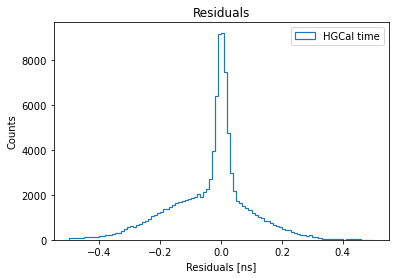

[-0.00995439  0.01398516]


In [ ]:
#t_res_avg,energies_avg,pt_avg,isCharged_avg=compute_residuals_energies(filename)
#t_res_mtd,energies_mtd,pt_mtd,isCharged_mtd =compute_residuals_energies_MTD(fn_resolved)
#t_res_mtd_trckonly,energies_mtd_trckonly,pt_mtd_trckonly,isCharged_mtd_trckonly =compute_residuals_energies_MTD_trackonly(fn_resolved)
t_res_hgcal=t_res_all["hgcal"]
isCharged_hgcal=isCharged_all["hgcal"]
print(len(t_res_hgcal))
#print(isCharged_hgcal)
#print(len(t_res_hgcal1))


nbins=100


plt.title("Residuals")
plt.hist(t_res_hgcal,bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.5,0.5],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")
plt.show()


plt.title("Residuals of charged candidates")
plt.hist(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.1,0.1],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")

print(np.quantile(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],q=[0.25,0.75]))
#print()

h1=ROOT.TH1F("h1","Residuals of charged candidates;Res [ns];Counts",nbins,-0.1,0.1)
h1.Sumw2()
f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

for i in range(len(t_res_hgcal)):
    if isCharged_hgcal[i]:
        h1.Fill(t_res_hgcal[i])

ROOT.gStyle.SetOptFit(True)
c1=ROOT.TCanvas()
c1.cd()
h1.Draw("E")
f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
#f_cruijff.FixParameter(4,0)
#f_cruijff.FixParameter(5,0)

fitresult=h1.Fit(f_gaus,"S","",-0.03,0.030)
print(fitresult)
print("cov:",fitresult.GetCovarianceMatrix()[0][0])
c1.Draw()

c2=ROOT.TCanvas()
c2.cd()
h1.Draw("E")


#fitresult=h1.Fit(f_cruijff,"S","",-0.05,0.05)
c2.Draw()

In [ ]:
#t_res_avg,energies_avg,pt_avg,isCharged_avg=compute_residuals_energies(filename)
#t_res_mtd,energies_mtd,pt_mtd,isCharged_mtd =compute_residuals_energies_MTD(fn_resolved)
#t_res_mtd_trckonly,energies_mtd_trckonly,pt_mtd_trckonly,isCharged_mtd_trckonly =compute_residuals_energies_MTD_trackonly(fn_resolved)
print(len(t_res_hgcal))
nbins=100


plt.title("Residuals")
plt.hist(t_res_hgcal,bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.5,0.5],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")
plt.show()


plt.title("Residuals of charged candidates")
plt.hist(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],bins=nbins, histtype="step",label="HGCal time",log=False, range=[-0.1,0.1],linewidth=lw)
#plt.hist(energies_hgcal,bins=nbins,histtype="step",label="HGCal time",log=True, range=[0,60],linewidth=lw)
#plt.hist(energies_avg,bins=nbins,histtype="step",label="Averaged",log=True, range=[0,60],linewidth=lw)

plt.legend()
plt.xlabel("Residuals [ns]")
plt.ylabel("Counts")

print(np.quantile(np.array(t_res_hgcal)[np.array(isCharged_hgcal)],q=[0.25,0.75]))
#print()

h1=ROOT.TH1F("h1","Residuals of charged candidates;Residual [ns];Counts",nbins,-0.1,0.1)
h1.Sumw2()
f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

for i in range(len(t_res_hgcal)):
    if isCharged_hgcal[i]:
        h1.Fill(t_res_hgcal[i])

ROOT.gStyle.SetOptFit(True)
c1=ROOT.TCanvas("c2","c2",int(1200*3/2),int(800*3/2))
c1.cd()
h1.SetLineWidth(2)
h1.Draw("E")
f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
#f_cruijff.FixParameter(4,0)
#f_cruijff.FixParameter(5,0)
f_gaus.SetLineColor(ROOT.kBlue)
f_gaus.SetTitle("Gaussian")
f_cruijff.SetTitle("Cruijff")

fitresult=h1.Fit(f_cruijff,"S","",-0.03,0.03)
params=f_cruijff.GetParameters()
#f_cruijff.Draw("SAME")
fitresult=h1.Fit(f_gaus,"S+","SAME",-0.03,0.03)
params_gauss=f_gaus.GetParameters()
sigma_c=(params[2]+params[3])/2
print("C:", (params[2]+params[3])/2, "G:", params_gauss[2] , "diff", (params_gauss[2]-sigma_c)/sigma_c)


c1.GetPad(0).SetBorderSize(4)
print(fitresult)
print(fitresult.GetCovarianceMatrix())
c1.Draw()
legend=ROOT.TLegend(0.2,0.8,0.4,0.7)
legend.AddEntry(f_gaus)
legend.AddEntry(f_cruijff)
legend.Draw()


#c1.BuildLegend()
"""
c2=ROOT.TCanvas()
c2.cd()
h1.Draw("E")


#fitresult=h1.Fit(f_cruijff,"S","",-0.05,0.05)
c2.Draw()
"""

In [ ]:
dict_data={}


In [ ]:

folders_1p9 = ["SinglePionTiming_1p9_100GeV", "SinglePionTiming_1p9_10GeV",
 "SinglePionTiming_1p9_15GeV", "SinglePionTiming_1p9_2GeV",
 "SinglePionTiming_1p9_30GeV", "SinglePionTiming_1p9_4GeV",
 "SinglePionTiming_1p9_50GeV", "SinglePionTiming_1p9_6GeV",
 "SinglePionTiming_1p9_8GeV"]

for i in range(len(folders_1p9)):
    file_name="./Energy_Bins/"+folders_1p9[i]+"/output.root"
    dict_data[folders_1p9[i]]=compute_residuals_energiesALL(file_name)



In [ ]:


folders_2p2 = ["SinglePionTiming_2p2_100GeV", "SinglePionTiming_2p2_10GeV",
 "SinglePionTiming_2p2_15GeV", "SinglePionTiming_2p2_2GeV",
 "SinglePionTiming_2p2_30GeV", "SinglePionTiming_2p2_4GeV",
 "SinglePionTiming_2p2_50GeV", "SinglePionTiming_2p2_6GeV",
 "SinglePionTiming_2p2_8GeV"]

for i in range(len(folders_2p2)):
    file_name="./Energy_Bins/"+folders_2p2[i]+"/output.root"
    dict_data[folders_2p2[i]]=compute_residuals_energiesALL(file_name)

    


In [23]:
#print(dict_data.keys())








from multiprocessing import Process, Queue

import re


def resolution(folder,tag,dict_resolutions,Q):
    
    
    t_res_all, energies_all, pt_all, isCharged_all=dict_data[folder]
   
    nbins=100
    


    histo={"avg":ROOT.TH1F("combined","Res Combination;Res [ns];Counts",nbins,-0.1,0.1),
          "hgcal":ROOT.TH1F("hgcal","Res HGCal;Res [ns];Counts",nbins,-0.1,0.1),
          "mtd":ROOT.TH1F("mtd","Res MTD;Res [ns];Counts",nbins,-0.1,0.1)}
    
    #f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
    f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

    for key in t_res_all:
        for i in range(len(t_res_all[key])):
            if isCharged_all[key][i]:
                histo[key].Fill(t_res_all[key][i])



    ROOT.gStyle.SetOptFit(True)

    #mg=ROOT.TMultiGraph()

    c1=ROOT.TCanvas()
    c1.cd()
    histo["avg"].SetLineColor(ROOT.kMagenta+2)

    histo["hgcal"].SetLineColor(ROOT.kCyan+2)


    histo["mtd"].SetLineColor(ROOT.kSpring+4)

    [histo[key].SetLineWidth(2) for key in histo]
    [histo[key].Sumw2() for key in histo]
    [histo[key].Draw("SAME E") for key in histo]
    
    c1.BuildLegend()
    
    f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
    f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
    f_cruijff.SetParLimits(2,0.01,10)
    f_cruijff.SetParLimits(3,0.01,10)
    f_cruijff.SetParLimits(4,0.00001,10)
    f_cruijff.SetParLimits(5,0.00001,10)
    
    match = re.search(r'(\d+)GeV', folder)
    
    
    
    
    
    resolutions={}
    resolution_errs={}
    
    for key in t_res_all:
        if(int(match.group(1))==2):
            print(2)
            f_cruijff.SetParameters(200,-0.0007,0.0224223,0.0224223,0.01,0.01)
            f_cruijff.FixParameter(4,0.0001)
            f_cruijff.FixParameter(5,0.0001)
            fitresult=histo[key].Fit(f_cruijff,"LN","",-0.03,0.03)
            f_cruijff.SetParLimits(2,0.01,10)
            f_cruijff.SetParLimits(3,0.01,10)
            f_cruijff.ReleaseParameter(4)
            f_cruijff.ReleaseParameter(5)
            #f_cruijff.FixParameter(4,0.0001)
            #f_cruijff.FixParameter(5,0.0001)
        
        print(folder)
        f_cruijff.ReleaseParameter(4)
        f_cruijff.ReleaseParameter(5)
        fitresult=histo[key].Fit(f_cruijff,"MLS+","SAME",-0.1,0.1)
        cov_matrix=fitresult.GetCovarianceMatrix()
        params=f_cruijff.GetParameters()
        sigma_c=(params[2]+params[3])/2

        resolutions[key]=sigma_c
        resolution_errs[key]=math.sqrt(0.25*(cov_matrix[2][2]+cov_matrix[3][3])+ 0.5*cov_matrix[2][3])
    
    match = re.search(r'(\d+)GeV', folder)
    
    dict_resolutions[int(match.group(1))]=[resolutions,resolution_errs]
    Q.put(dict_resolutions)
    if "1p9" in folder:
        c1.SaveAs("1p9/H"+str(tag)+".pdf")
        
    if "2p2" in folder:
        c1.SaveAs("2p2/H"+str(tag)+".pdf")
        
    c1.SaveAs("H"+str(tag)+".pdf")
    

    

In [27]:

folders_1p9 = ["SinglePionTiming_1p9_100GeV", "SinglePionTiming_1p9_10GeV",
 "SinglePionTiming_1p9_15GeV", "SinglePionTiming_1p9_2GeV",
 "SinglePionTiming_1p9_30GeV", "SinglePionTiming_1p9_4GeV",
 "SinglePionTiming_1p9_50GeV", "SinglePionTiming_1p9_6GeV",
 "SinglePionTiming_1p9_8GeV"]
#folders_1p9 = ["SinglePionTiming_1p9_10GeV", "SinglePionTiming_1p9_2GeV", "SinglePionTiming_1p9_30GeV",]


folders_2p2 = ["SinglePionTiming_2p2_100GeV", "SinglePionTiming_2p2_10GeV",
 "SinglePionTiming_2p2_15GeV", "SinglePionTiming_2p2_2GeV",
 "SinglePionTiming_2p2_30GeV", "SinglePionTiming_2p2_4GeV",
 "SinglePionTiming_2p2_50GeV", "SinglePionTiming_2p2_6GeV",
 "SinglePionTiming_2p2_8GeV"]


In [26]:

folders_1p9 = ["SinglePionTiming_1p9_100GeV", "SinglePionTiming_1p9_10GeV",
 "SinglePionTiming_1p9_15GeV", "SinglePionTiming_1p9_2GeV",
 "SinglePionTiming_1p9_30GeV", "SinglePionTiming_1p9_4GeV",
 "SinglePionTiming_1p9_50GeV", "SinglePionTiming_1p9_6GeV",
 "SinglePionTiming_1p9_8GeV"]
#folders_1p9 = ["SinglePionTiming_1p9_10GeV", "SinglePionTiming_1p9_2GeV", "SinglePionTiming_1p9_30GeV",]


folders_2p2 = ["SinglePionTiming_2p2_100GeV", "SinglePionTiming_2p2_10GeV",
 "SinglePionTiming_2p2_15GeV", "SinglePionTiming_2p2_2GeV",
 "SinglePionTiming_2p2_30GeV", "SinglePionTiming_2p2_4GeV",
 "SinglePionTiming_2p2_50GeV", "SinglePionTiming_2p2_6GeV",
 "SinglePionTiming_2p2_8GeV"]

'''for i in range(len(folders_1p9)):
    resolution
'''

numeri_GeV = []

procs=[]

q=Queue()
dict_resolutions={}
res={}
    
for folder in folders_1p9:
    match = re.search(r'(\d+)GeV', folder)
    if match:
        numeri_GeV.append(int(match.group(1)))
    p=Process(target=resolution,args=(folder,folder,dict_resolutions,q))
    procs.append(p)
    p.start()
    p.join()
    #t_resolution,t_resolution_err=resolution(folder,folder,dict_resolutions)



    

    
for job in procs:
    job.join()

for i in range(len(folders_1p9)):
    dict_resolutions.update(q.get())
    
print(dict_resolutions)

    
    
import pickle


with open('1p9.pickle', 'wb') as handle:
    pickle.dump(dict_resolutions, handle, protocol=pickle.HIGHEST_PROTOCOL)




Process Process-1:
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3250/1650079036.py", line 18, in resolution
    t_res_all, energies_all, pt_all, isCharged_all=dict_data[folder]
NameError: name 'dict_data' is not defined
Process Process-2:
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/

KeyboardInterrupt: 

# Plotting of 1p9

In [28]:


file = open('1p9.pickle', 'rb')
dict_resolutions = pickle.load(file)
file.close()



g_dict={"avg":ROOT.TGraphErrors(),
        "hgcal":ROOT.TGraphErrors(),
        "mtd":ROOT.TGraphErrors()}

print(dict_resolutions)
print(dict_resolutions[2])
counter=0
for enkey in dict_resolutions.keys():
    for typekey in dict_resolutions[enkey][0]:
        g_dict[typekey].AddPoint(enkey,dict_resolutions[enkey][0][typekey])#,0.,dict_resolutions[enkey][1][typekey])
        g_dict[typekey].SetPointError(counter,0,dict_resolutions[enkey][1][typekey])
    counter=counter+1
cmg=ROOT.TCanvas()
cmg.cd()
mg=ROOT.TMultiGraph()


g_dict["avg"].SetLineColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerStyle(22)
g_dict["avg"].SetTitle("Combination")

g_dict["hgcal"].SetLineColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerStyle(20)
g_dict["hgcal"].SetTitle("HGCal time")


g_dict["mtd"].SetLineColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerStyle(34)
g_dict["mtd"].SetTitle("MTD time")
#[g_dict[x].SetTitle(str(x)) for x in g_dict.keys()]


f_res_E=ROOT.TF1("fres",res_E_fit,0.001,600.,3)#[g_dict[x].SetMarkerStyle(20) for x in g_dict.keys()]
f_res_E.SetNpx(1000)
f_res_E.SetParameters(1.,1.,0.016)
f_res_E.SetParNames("S","N","C")


ROOT.gStyle.SetOptFit(True)

g_dict["hgcal"].Fit(f_res_E,"r")

[mg.Add(g_dict[x]) for x in g_dict.keys()]

mg.SetTitle("Time resolution;p_{T} [GeV/c]; Resolution [ns]")
mg.Draw("AP")

#cmg.BuildLegend()
legend=ROOT.TLegend(0.2,0.8,0.4,0.7)

legend.AddEntry(g_dict["avg"])
legend.AddEntry(g_dict["mtd"])
legend.AddEntry(g_dict["hgcal"])
legend.Draw()

text = ROOT.TLatex()
text.SetNDC(1)  # Imposta le coordinate in termini di frazione del canvas (0-1)
text.SetTextSize(0.04)  # Imposta la dimensione del testo
text.SetTextAlign(31)  # Allinea il testo a destra rispetto alla posizione specificata
text.DrawLatex(0.9, 0.92, "#eta=1.9")  # (x, y, testo) posizione nell'angolo in alto a destra
mg.SetMinimum(0.)
mg.SetMaximum(0.035)



cmg.Draw()

cmg.SaveAs("Resolution_1p9.pdf")




{100: [{'avg': 0.012885225893377594, 'hgcal': 0.015019751874218997, 'mtd': 0.024450055341976605}, {'avg': 8.978436086730116e-05, 'hgcal': 0.00010631459645166139, 'mtd': 0.00021797482285630283}], 10: [{'avg': 0.016456539244643447, 'hgcal': 0.019871318440115443, 'mtd': 0.02442007113629372}, {'avg': 0.00012473912059753224, 'hgcal': 0.0001721655419087708, 'mtd': 0.0002171373888030084}], 15: [{'avg': 0.015016411677641563, 'hgcal': 0.018723477136627267, 'mtd': 0.023956393900472897}, {'avg': 0.00011039403607397753, 'hgcal': 0.0001509521313346312, 'mtd': 0.00021335897348068257}], 2: [{'avg': 0.0230434504649807, 'hgcal': 0.030221748199318943, 'mtd': 0.023738707073168566}, {'avg': 0.00020118997993230617, 'hgcal': 0.0009673520466411866, 'mtd': 0.00020621757613063248}], 30: [{'avg': 0.013581286554434586, 'hgcal': 0.016688343504708568, 'mtd': 0.02405022172902025}, {'avg': 9.341591030084862e-05, 'hgcal': 0.00012110358267698906, 'mtd': 0.00021516748273727517}], 4: [{'avg': 0.019439598119071887, 'hgca

Info in <TCanvas::Print>: pdf file Resolution_1p9.pdf has been created


# Fit of 2.2

In [29]:
procs=[]

q=Queue()
dict_resolutions={}
res={}
    
for folder in folders_2p2:
    match = re.search(r'(\d+)GeV', folder)
    if match:
        numeri_GeV.append(int(match.group(1)))
    p=Process(target=resolution,args=(folder,folder,dict_resolutions,q))
    procs.append(p)
    p.start()
    #t_resolution,t_resolution_err=resolution(folder,folder,dict_resolutions)



    

    
for job in procs:
    job.join()

for i in range(len(folders_1p9)):
    dict_resolutions.update(q.get())
    
print(dict_resolutions)

    
    
import pickle


with open('2p2.pickle', 'wb') as handle:
    pickle.dump(dict_resolutions, handle, protocol=pickle.HIGHEST_PROTOCOL)


    


Process Process-10:
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-11:
  File "/tmp/ipykernel_3250/1650079036.py", line 18, in resolution
    t_res_all, energies_all, pt_all, isCharged_all=dict_data[folder]
Traceback (most recent call last):
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process Process-12:
NameError: name 'dict_data' is not defined
  File "/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-el9-gcc13-opt/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self.

KeyboardInterrupt: 

# Plotting of 2.2

In [30]:
file = open('2p2.pickle', 'rb')
dict_resolutions = pickle.load(file)
file.close()


g_dict={"avg":ROOT.TGraphErrors(),
        "hgcal":ROOT.TGraphErrors(),
        "mtd":ROOT.TGraphErrors()}

counter=0

for enkey in dict_resolutions.keys():
    for typekey in dict_resolutions[enkey][0]:
        g_dict[typekey].AddPoint(enkey*math.cosh(),dict_resolutions[enkey][0][typekey])#,0.,dict_resolutions[enkey][1][typekey])
        g_dict[typekey].SetPointError(counter,0,dict_resolutions[enkey][1][typekey])
    counter=counter+1
cmg=ROOT.TCanvas()
cmg.cd()
mg=ROOT.TMultiGraph()


g_dict["avg"].SetLineColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerColor(ROOT.kMagenta+2)
g_dict["avg"].SetMarkerStyle(22)
g_dict["avg"].SetTitle("Combination")

g_dict["hgcal"].SetLineColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerColor(ROOT.kCyan+2)
g_dict["hgcal"].SetMarkerStyle(20)
g_dict["hgcal"].SetTitle("HGCal time")


g_dict["mtd"].SetLineColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerColor(ROOT.kSpring+4)
g_dict["mtd"].SetMarkerStyle(34)
g_dict["mtd"].SetTitle("MTD time")
#[g_dict[x].SetTitle(str(x)) for x in g_dict.keys()]

#[g_dict[x].SetMarkerStyle(20) for x in g_dict.keys()]

[mg.Add(g_dict[x]) for x in g_dict.keys()]

mg.SetTitle("Time resolution;p_{T} [GeV/c]; Resolution [ns]")
mg.Draw("AP")
legend=ROOT.TLegend(0.2,0.8,0.4,0.7)

legend.AddEntry(g_dict["avg"])
legend.AddEntry(g_dict["mtd"])
legend.AddEntry(g_dict["hgcal"])
legend.Draw()

text = ROOT.TLatex()
text.SetNDC(1)  # Imposta le coordinate in termini di frazione del canvas (0-1)
text.SetTextSize(0.04)  # Imposta la dimensione del testo
text.SetTextAlign(31)  # Allinea il testo a destra rispetto alla posizione specificata
text.DrawLatex(0.9, 0.92, "#eta=2.2")  # (x, y, testo) posizione nell'angolo in alto a destra

mg.SetMinimum(0.)
mg.SetMaximum(0.35)



cmg.Draw()

cmg.SaveAs("Resolution_2p2.pdf")

    
    


Info in <TCanvas::Print>: pdf file Resolution_2p2.pdf has been created


In [ ]:
print(dict_resolutions)

In [ ]:

with open('1p9.pickle', 'rb') as handle:
    b = pickle.load(handle)


In [ ]:
print(dict_resolutions)

In [ ]:




histo={"avg":ROOT.TH1F("combined","Res Combination;Res [ns];Counts",nbins,-0.1,0.1),
      "hgcal":ROOT.TH1F("hgcal","Res HGCal;Res [ns];Counts",nbins,-0.1,0.1),
      "mtd":ROOT.TH1F("mtd","Res MTD;Res [ns];Counts",nbins,-0.1,0.1)}




h1=ROOT.TH1F("h1","Residuals of charged candidates;Res [ns];Counts",nbins,-0.1,0.1)
h1.Sumw2()
f_gaus=ROOT.TF1("f1","gaus(0)",-10.,10.)
f_cruijff=ROOT.TF1("f2",cruijff,-10,10.,6)

for key in t_res_all:
    for i in range(len(t_res_all[key])):
        if isCharged_all[key][i]:
            histo[key].Fill(t_res_all[key][i])
            

            
ROOT.gStyle.SetOptFit(True)

#mg=ROOT.TMultiGraph()

c1=ROOT.TCanvas()
c1.cd()
[histo[key].SetLineWidth(2) for key in histo]

[histo[key].Draw("SAME PLC E") for key in histo]

c1.BuildLegend()

f_cruijff.SetParNames("A","#mu","#sigma_L","#sigma_R","#alpha_L","#alpha_R")
f_cruijff.SetParameters(3000,0.0019,0.0173,0.0173,0,0)
resolutions={}
resolution_errs={}
for key in t_res_all:
    fitresult=histo[key].Fit(f_cruijff,"S+","SAME",-0.03,0.03)
    cov_matrix=fitresult.GetCovarianceMatrix()
    params=f_cruijff.GetParameters()
    sigma_c=(params[2]+params[3])/2
    
    resolutions[key]=sigma_c
    resolution_errs[key]=math.sqrt(0.25*(cov_matrix[2][2]+cov_matrix[3][3])+ 0.5*cov_matrix[2][3])
    
    n_params = f_cruijff.GetNpar()  # Numero di parametri del fit
    '''
    for i in range(n_params):
        for j in range(n_params):
            print(f"Cov[{i}][{j}] = {cov_matrix[i][j]}")
    '''
    
    
print("res:",resolutions)
print("resErr:",resolution_errs)

c1.Draw()
